Importiamo librerie e file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/home/giovanni/Programs/Python3/DataAnalyst-course/Esercizi/Giorno 5/ordini_amazon.csv")
df

,Data,Articolo,Categoria,Prezzo,Quantità,Stato
0,2024-01-04,Cuffie Bluetooth,Elettronica,39.99,1,Consegnato
1,2024-01-18,T-shirt nera,Abbigliamento,14.99,2,Consegnato
2,2024-02-05,Libro Python,Libri,23.50,1,Consegnato
3,2024-02-18,Lampada LED,Casa,27.90,1,Consegnato
4,2024-03-03,Scarpe sportive,Abbigliamento,54.00,1,Consegnato
5,2024-03-20,Custodia telefono,Elettronica,12.99,1,Consegnato
6,2024-04-01,Pentola antiaderente,Casa,31.90,1,Consegnato
7,2024-04-14,Mouse wireless,Elettronica,18.99,1,Reso
8,2024-05-02,Libro Data Science,Libri,28.00,1,Consegnato
9,2024-05-16,Calzini sportivi,Abbigliamento,9.99,3,Consegnato


Filtra solo gli ordini con stato "Consegnato".


In [ ]:
# Filtra solo gli ordini con stato "Consegnato".
df_consegnati = df[df["Stato"] == "Consegnato"]
df_consegnati

,Data,Articolo,Categoria,Prezzo,Quantità,Stato
0,2024-01-04,Cuffie Bluetooth,Elettronica,39.99,1,Consegnato
1,2024-01-18,T-shirt nera,Abbigliamento,14.99,2,Consegnato
2,2024-02-05,Libro Python,Libri,23.50,1,Consegnato
3,2024-02-18,Lampada LED,Casa,27.90,1,Consegnato
4,2024-03-03,Scarpe sportive,Abbigliamento,54.00,1,Consegnato
5,2024-03-20,Custodia telefono,Elettronica,12.99,1,Consegnato
6,2024-04-01,Pentola antiaderente,Casa,31.90,1,Consegnato
8,2024-05-02,Libro Data Science,Libri,28.00,1,Consegnato
9,2024-05-16,Calzini sportivi,Abbigliamento,9.99,3,Consegnato


Aggiungi una colonna "Totale" (Prezzo * Quantità).

In [ ]:
#Aggiungi una colonna "Totale" (Prezzo * Quantità).
df["Totale"] = df["Prezzo"] * df["Quantità"]
df

,Data,Articolo,Categoria,Prezzo,Quantità,Stato,Totale
0,2024-01-04,Cuffie Bluetooth,Elettronica,39.99,1,Consegnato,39.99
1,2024-01-18,T-shirt nera,Abbigliamento,14.99,2,Consegnato,29.98
2,2024-02-05,Libro Python,Libri,23.50,1,Consegnato,23.50
3,2024-02-18,Lampada LED,Casa,27.90,1,Consegnato,27.90
4,2024-03-03,Scarpe sportive,Abbigliamento,54.00,1,Consegnato,54.00
5,2024-03-20,Custodia telefono,Elettronica,12.99,1,Consegnato,12.99
6,2024-04-01,Pentola antiaderente,Casa,31.90,1,Consegnato,31.90
7,2024-04-14,Mouse wireless,Elettronica,18.99,1,Reso,18.99
8,2024-05-02,Libro Data Science,Libri,28.00,1,Consegnato,28.00
9,2024-05-16,Calzini sportivi,Abbigliamento,9.99,3,Consegnato,29.97


Calcola il totale speso per categoria.

In [ ]:
#Calcola il totale speso per categoria.
totale_categoria = df.groupby("Categoria")["Totale"].sum()
totale_categoria

Categoria
Abbigliamento    113.95
Casa              59.80
Elettronica       71.97
Libri             51.50
Name: Totale, dtype: float64

Crea un grafico a barre delle spese totali per categoria.

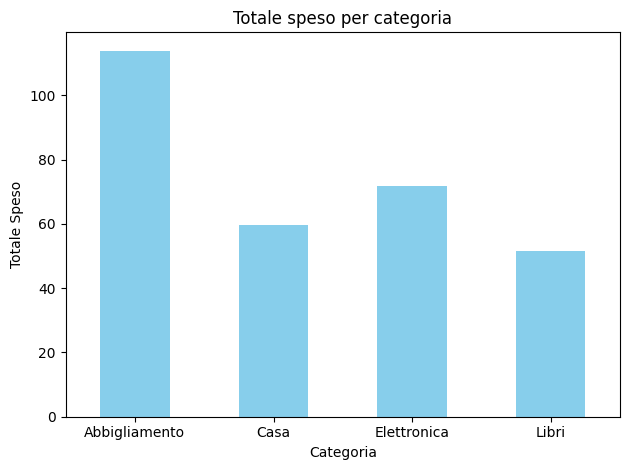

In [9]:
#Crea un grafico a barre delle spese totali per categoria.
totale_categoria.plot(kind='bar', color='skyblue')
plt.title("Totale speso per categoria")
plt.xlabel("Categoria")
plt.ylabel("Totale Speso")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Visualizza l’andamento mensile della spesa totale (grafico a linee).

In [25]:
#Visualizza l’andamento mensile della spesa totale (grafico a linee).
df['Data'] = pd.to_datetime(df['Data']) # Assicurati che la colonna 'Data' sia in formato datetime
df['Mese'] = df['Data'].dt.to_period('M') # Estrai il mese dalla data
spesa_mensile = df.groupby('Mese')['Totale'].sum()
spesa_mensile

Mese
2024-01    69.97
2024-02    51.40
2024-03    66.99
2024-04    50.89
2024-05    57.97
Freq: M, Name: Totale, dtype: float64

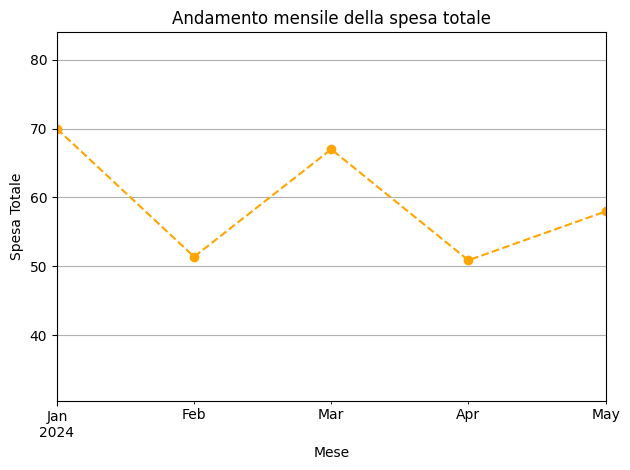

In [ ]:
spesa_mensile.plot(kind='line', marker='o', linestyle="--", color='orange')
plt.title("Andamento mensile della spesa totale")
plt.xlabel("Mese")
plt.ylabel("Spesa Totale")
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(spesa_mensile.min() * 0.6, spesa_mensile.max() * 1.2)  # Imposta un range per l'asse y con un 20% di margine superiore e un 40% di margine inferiore
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

(Extra) Qual è il mese in cui hai speso di più? E la categoria su cui hai speso di più?

In [16]:
#(Extra) Qual è il mese in cui hai speso di più? E la categoria su cui hai speso di più?
mese_max_spesa = spesa_mensile.idxmax()
categoria_max_spesa = totale_categoria.idxmax()

print(f"Il mese in cui hai speso di più è: {mese_max_spesa}")
print(f"La categoria su cui hai speso di più è: {categoria_max_spesa}")

Il mese in cui hai speso di più è: 2024-01
La categoria su cui hai speso di più è: Abbigliamento
